## Q3. Bayesian Inference

### Data Overview

The dataset is derived from standard rated chess games played on [lichess.org](https://database.lichess.org).  
Each data point represents:

- **Input $x$**: ELO difference, calculated as White's ELO rating minus Black's ELO.
- **Output $y$**: Win probability for the White player, sampled from a probabilistic model built using Lichess's game database.

These data points will be used to illustrate Bayesian linear regression.

Now, let's load 21 example data points for this demonstration. You don’t need to modify anything—just run the next two code blocks.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# The x and y dimensions in this dataset

x = np.array([[-139.15341508, -681.19390135,  374.83381147,  461.45761931,
       -205.65507596,    7.52847535, -551.03494308,  659.15105943,
       -215.83519299, -341.60486674,  590.2827852 ,  648.04672811,
        393.6312089 ,  190.73955575,  388.96338453, -252.161518  ,
       -251.64298135, -657.19690255, -352.94565567, -178.58059633,
        304.90248582]])
y = np.array([[0.44610327, 0.1444    , 0.7737475 , 0.81391054, 0.24666655,
       0.49943957, 0.12402231, 0.93239468, 0.28009304, 0.14202444,
       0.88360894, 0.84497416, 0.72092098, 0.6790719 , 0.84907639,
       0.24405219, 0.27233288, 0.13289914, 0.25335661, 0.34657246,
       0.78085279]])

# The data source: Database of standard rated games, played on lichess.org
# https://database.lichess.org/standard/lichess_db_standard_rated_2013-03.pgn.zst
# x in the above data are ELO differences for White ELO - Black ELO
# y is the win probability sampled from a probabilistic model from Liches DB


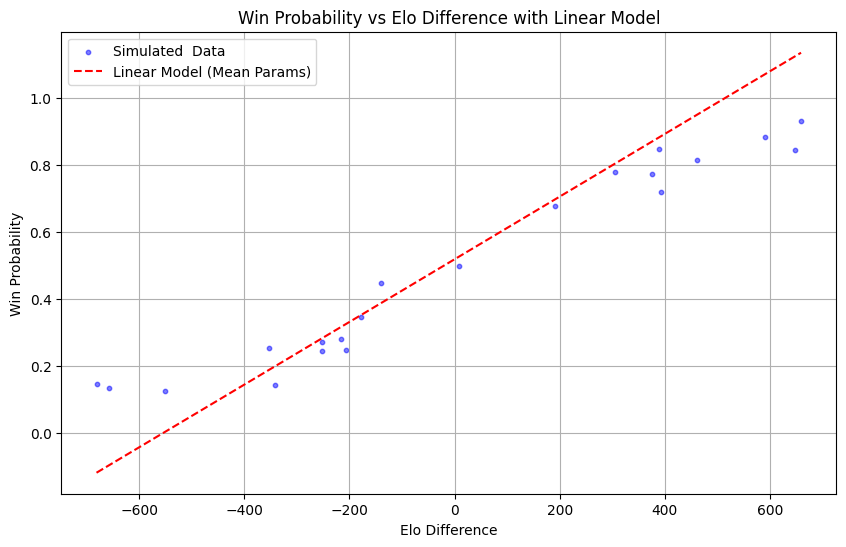

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Mean values of the parameters from the MCMC samples
linear_beta_mean = 0.00093696
linear_intercept_mean = 0.51848817

# Generate Elo differences over a range for plotting the sigmoid curve
elo_diff_range = np.linspace(x.min(), x.max(), 100)

x_true_plot = elo_diff_range
y_true_plot = linear_beta_mean * elo_diff_range + linear_intercept_mean

# Plot the synthetic data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color="blue", label="Simulated  Data")

# Plot the "true" sigmoid model as a red, dashed line
plt.plot(x_true_plot, y_true_plot, color="red", linestyle="--", label="Linear Model (Mean Params)")

# Labels and legend
plt.xlabel("Elo Difference")
plt.ylabel("Win Probability")
plt.title("Win Probability vs Elo Difference with Linear Model")
plt.legend()
plt.grid(True)
plt.show()


Qa. Find prior hyperparameters (prior_mean and prior_covariance);

In [37]:
# TODO 2:
# Prior hyperparameters
sigma_w_2 = 1
sigma_b_2 = 1
prior_mean = np.array([0, 0])
prior_covariance = [[sigma_w_2, 0],[0, sigma_b_2]]


Qb. Find $\omega_{MAP}$

In [38]:
import numpy as np
# TODO 1: write the function to compute for \omega_{MAP}
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

w_variance, b_variance = 1, 1
lambda_w = 1 / w_variance
lambda_b = 1 / b_variance
L = np.diag([lambda_w, lambda_b])

ones = np.ones((x.shape[0], 1))
X = np.hstack((x, ones))
w = np.linalg.inv(X.T @ X + L) @ X.T @ y
print('[w,b]map')
print(w)

[w,b]map
[[0.00067235]
 [0.46732143]]


Qc. Find posterior hyperparameters (posterior_mean and posterior_covariance);

In [39]:
import numpy as np

# TODO 3:
# Compute posterior parameters
sigma2 = 1
V0 = np.diag([w_variance, b_variance])
V0_inv = np.linalg.inv(V0)
posterior_covariance = sigma2 * np.linalg.inv(sigma2 * V0_inv + X.T @ X)

# Prior mean is zero, so we drop the first term of the formula.
posterior_mean = (1 / sigma2) * posterior_covariance @  X.T @ y

print('Posterior Covariance')
print(posterior_covariance)
print('Posterior Mean')
print(posterior_mean)

# Sample from the posterior distribution
num_samples = 100
samples = np.random.multivariate_normal(posterior_mean.flatten(), posterior_covariance, size=num_samples)
x_orig = x
y_orig = y

Posterior Covariance
[[ 2.70404745e-07 -2.36643563e-06]
 [-2.36643563e-06  4.54752552e-02]]
Posterior Mean
[[0.00067235]
 [0.46732143]]


Qd. Based on all the fitted lines of Bayesian linear regression: (1) Plot all the samples of slopes. (2) Choose the most reasonable slope that fits the data linearly. Please report the slopefind one fitted line that best represent the relationship between $x$ and $y$

Best Slope: 0.0006065338549868349
Best Intercept: 0.4957760422280231


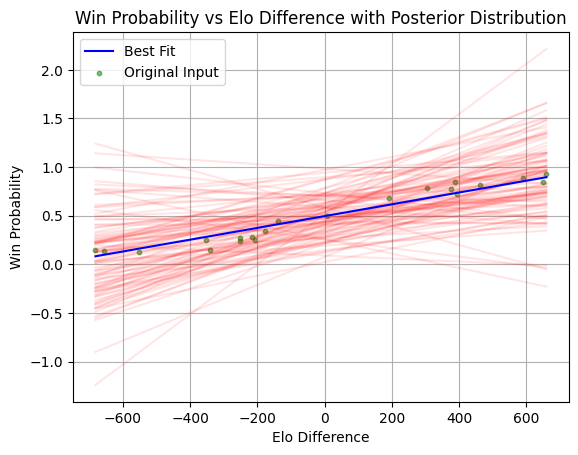

In [40]:
import matplotlib.pyplot as plt

# TODO 4: Find the mode result of all the samples and plot it
x = np.linspace(x.min(), x.max(), 100)
for w, b in samples:
    y = w * x + b
    plt.plot(x, y, color='red', alpha=0.1)
    
w = samples[:, 0]
b = samples[:, 1]
best_slope, best_intercept = w.mean(), b.mean()
best_line = best_slope * x + best_intercept

print('Best Slope:', best_slope)
print('Best Intercept:', best_intercept)

plt.plot(x, best_line, color='blue', label='Best Fit')
plt.scatter(x_orig, y_orig, alpha=0.5, s=10, color='green', label='Original Input')
plt.xlabel("Elo Difference")
plt.ylabel("Win Probability")
plt.title("Win Probability vs Elo Difference with Posterior Distribution")
plt.legend()
plt.grid(True)
plt.show()
